# Balls and Bins
--------

In this notebook, We will examine the famous [Balls and Bins](https://en.wikipedia.org/wiki/Balls_into_bins) problem. Consider $n$ balls droping into $n$ bins independetly uniform at random. The theorem says: The bin with maximum load has a.a.s $\frac{(2+o(1)) \lg n}{\lg\lg n} $ balls inside.

There is another version of the problem, mainly known as The Power of Two Choices , in which each balls has picks two bins indepent of other balls and drop into the bin with smaller balls. In this case the maximum load drop dramatically into $\lg \lg n + \theta(1)$.

**Remark : ** We will plot semi-log diagram of maximum load per $n$. As $n$ must grow exponentially, we may barely reach 22 iterations. You may compare the asymptotic function with the experimental values.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets.widgets import IntSlider,Checkbox
from datetime import datetime as dt
%matplotlib inline
plt.rcParams['figure.figsize']=(14,4)
#Uncomment the line below for better quality of figures
#%config InlineBackend.figure_format='svg'

iterations=22
epochs=10
x=range(3,iterations)
start=dt.now()

This function returns maximum load for different values of balls and bins. You may see the histogram by checking the display.

In [2]:
@interact(balls=IntSlider(min=0,max=300),bins=IntSlider(min=2,max=100),disp=Checkbox(False,description='Display Histogram'))
def balls_and_bins (balls,bins,disp=False):
    A=np.zeros(bins)
    for j in range(balls):
        A[np.random.randint(0,bins)]+=1
    if disp: plt.bar(range(bins),A)
    return np.max(A)

interactive(children=(IntSlider(value=0, description='balls', max=300), IntSlider(value=2, description='bins', min=2), Checkbox(value=False, description='Display Histogram'), Output()), _dom_classes=('widget-interact',))

In [3]:
def monte_carlo(func):
    mx=[]
    for i in range(3,iterations):
        results=[]
        for j in range(epochs):
            results.append(func(2**i,2**i))
        mx.append(np.mean(results))
    return mx

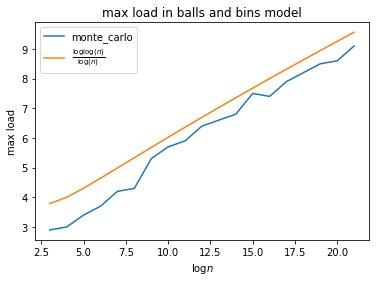

In [4]:
mx1=monte_carlo(balls_and_bins)

figure=plt.figure()
plt.plot(x,mx1,label='monte_carlo')
plt.plot(x,[2*x/np.log2(x) for x in x],label=r'$\frac{\log \log (n)}{\log (n)}$')
plt.xlabel('$\log n$')
plt.ylabel('max load')
plt.legend()
_=plt.title(r'max load in balls and bins model')

In [5]:
@interact(balls=IntSlider(min=0,max=300),bins=IntSlider(min=2,max=100),disp=Checkbox(False,description='Display Histogram'))
def power_of_two_choices(balls,bins,disp=False):
    A=np.zeros(bins)
    for j in range(balls):
        idx=np.random.randint(0,bins,size=2)
        if A[idx[0]]<A[idx[1]]:
            A[idx[0]]+=1
        else:
            A[idx[1]]+=1
    if disp: plt.bar(range(bins),A)
    return np.max(A)

interactive(children=(IntSlider(value=0, description='balls', max=300), IntSlider(value=2, description='bins', min=2), Checkbox(value=False, description='Display Histogram'), Output()), _dom_classes=('widget-interact',))

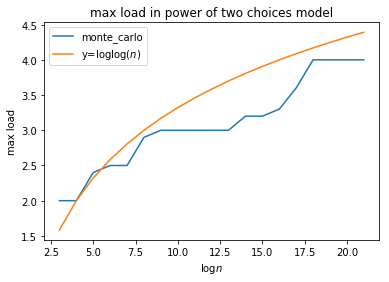

In [6]:
mx2=monte_carlo(power_of_two_choices)

figure=plt.figure()
plt.plot(x,mx2,label='monte_carlo')
plt.plot(x,[np.log2(x) for x in x],label=r'y=$\log \log (n)$')
plt.xlabel('$\log n$')
plt.ylabel('max load')
plt.legend()
_=plt.title(r'max load in power of two choices model')

For large $n$ it is not feasible to create a huge array to store the histogram of it. There is a better way for simulation and that is to store just the histogram. Every ball that is going to drop in a bin with $i$ balls inside, increase the number of bins with $i+1$ balls and decrease the number of bins with $i$ balls. So, it is enough to just choose an $i-$bin with the probability of $n_i/\sum(n_i)$ where $n_i$ is the number of $i-$bins. This algorithm is a slower but can maintain space usage. It is also easy to generalize this algorithm for power of two choices version.

**Remark : ** You may use it in the monte carlo instead of balls_and_bins function

In [7]:
@interact(balls=IntSlider(min=5,max=300),bins=IntSlider(min=5,max=100),power_of_two=Checkbox(False,description='Power of Two Choices'),disp=Checkbox(False,description='Display Histogram of Loads'))
def space_efficient_algorithm(balls,bins,power_of_two,disp=False):
    bin_hist=np.zeros(balls)
    bin_hist[0]=bins
    for i in range(balls):
        cumsum=np.cumsum(bin_hist)/bins
        threshold=np.random.rand()
        if power_of_two: threshold=min(threshold,np.random.rand())
        choice=np.min(np.argwhere(cumsum>=threshold))
        bin_hist[choice]-=1
        bin_hist[choice+1]+=1
    maxload=np.max(np.argwhere(bin_hist>0))
    if disp:plt.bar(range(maxload+2),bin_hist[:maxload+2])
    return maxload

interactive(children=(IntSlider(value=5, description='balls', max=300, min=5), IntSlider(value=5, description='bins', min=5), Checkbox(value=False, description='Power of Two Choices'), Checkbox(value=False, description='Display Histogram of Loads'), Output()), _dom_classes=('widget-interact',))

In [8]:
print('Total running time : ' , dt.now()-start)

Total running time :  0:08:43.706442
